# Интеллектуальный анализ данных – весна 2022

# Домашнее задание 7: Деревья. Случайный лес

Правила:

- Домашнее задание оценивается в 10 баллов (+1 бонусный балл).


- Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.


- Можно использовать любые свободные источники с обязательным указанием ссылки на них.


- Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.Я

<!-- ![](https://github.com/hse-ds/iad-intro-ds/blob/master/2023/homeworks/hw07-trees/meme.jpg?raw=1) -->
<img src="https://github.com/hse-ds/iad-intro-ds/blob/master/2023/homeworks/hw07-trees/meme.jpg?raw=1" alt="Drawing" style="width: 700px;"/>

## Часть 1: Основы построения решающие дерева (1.5 балла)

В этой части все расчёты необходимо реализовывать в виде запрограммированных формул, например, на `numpy`. **Нельзя использовать готовые реализации**. Например, если в задании требуется рассчитать энтропию, то требуется в каком-то виде релизовать расчёт по формуле, но нельзя использовать готовую реализацию `some_module.entropy()`.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.1 (0.5 балла)** Пусть известно, что в вершину решающего дерева попали 10 объектов, 8 из которых имеют метку класса $k_1$, а 2 имеют метку класса $k_2$. Рассчитайте энтропию такого распределения классов (с натуральным логарифмом). Ответ округлите до двух знаков после запятой.

In [ ]:
p_k1, p_k2  = 8/10, 2/10
entropy = np.around((-1)*(p_k1 * np.log(p_k1)+ p_k2 * np.log(p_k2)), 2)
entropy

0.5

**Задание 1.2 (0.5 балла)** Пусть дополнительно известно, что вершина из предыдущего задания не является листовой и возможно такое разбиение, что в левое поддерево попадут все объекты класса $k_1$, а в правое - класса $k_2$. Посчитайте критерий информативности:

$$
Q(R_m, j, t) = H(R_m) - \frac{|R_\ell|}{|R_m|}H(R_\ell) - \frac{|R_r|}{|R_m|}H(R_r),
$$

где $R_m$ - множество объектов в разбиваемой вершине, $j$ - номер признака, по которому происходит разбиение, $t$ - порог разбиения, $R_\ell$ - множество объектов в левом поддереве, $R_r$ - множество объектов в правом поддереве.

Теперь в качестве $H(R)$ будем использовать индекс Джини:

$$
H(R) = \sum_{k=1}^J p_k(1-p_k),
$$
где $J$ – общее количество классов (в нашем случае, $J = 2$).

Ответ округлите до двух знаков после запятой.

In [ ]:
H_Rm = p_k1 * (1 - p_k1) + p_k2 * (1 - p_k2)
p_k1_l, p_k2_l = 8/8, 0/8
p_k1_r, p_k2_r = 0/2, 2/2
H_Rl = p_k1_l * (1 - p_k1_l) + p_k2_l * (1 - p_k2_l)
H_Rr = p_k1_r * (1 - p_k1_r) + p_k2_r * (1 - p_k2_r)

Q = H_Rm - 8/10 * H_Rl - 2/10 * H_Rr
Q

0.32

**Задание 1.3 (0.5 балла)** Пусть при построении дерева образовалась листовая вершина с 10 объектами, значения целевой переменной для которых следующие: [1, 10, 5, 18, 100, 30, 50, 61, 84, 47] (решается задача регрессии). Чему будут равны предсказания модели для этих объектов?

In [ ]:
# если решается задача регресии, то в листе считаем среднее среди ответов
leaf = [1, 10, 5, 18, 100, 30, 50, 61, 84, 47]
prediction = sum(leaf)/len(leaf)
prediction

40.6

## Часть 2: Бэггинг и случайный лес (4 балла)

В данной части мы будем работать [с задачей предсказания диабета у пациента](https://www.kaggle.com/uciml/pima-indians-diabetes-database/data). Посмотрим на работу бэггинга над решающими деревьями и случайного леса, сравним их работу.

In [ ]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2023/homeworks/hw07-trees/diabetes.csv")
print(f"Dataset shape: {data.shape}")
data.head()

Dataset shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Посмотрим на распределение целевой переменной

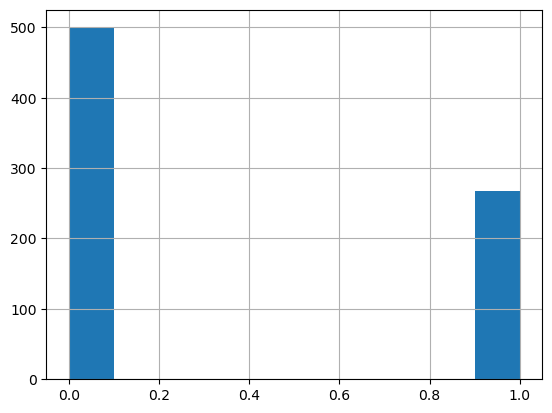

In [ ]:
data['Outcome'].hist()
plt.show()

**Задание 3.1 (0.5 балла)** Разделите данные на признаки и целевую переменную. Разбейте датасет на обучающую и тестовую части в отношении 7:3. Затем разделите обучающую выборку на обучающую-обучающую и обучающую-валидационную в соотношении 7:3 (то есть в итоге должно получиться три выборки: обучающая-обучающая (0.49 от исходного датасета), обучающая-валидационная (0.21 от исходного датасета) и тестовая (0.3 от исходного датасета).

In [ ]:
Diabet_Y = data.Outcome
data_X = data.drop(['Outcome'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    data_X, Diabet_Y, test_size=0.3, random_state=123)

In [ ]:
X_train_train, X_train_val, y_train_train, y_train_val = train_test_split(
    X_train, y_train, test_size=0.3, random_state=123)

In [ ]:
print(X_train_train.shape[0]/data.shape[0], X_train_val.shape[0]/data.shape[0],
      y_train_train.shape[0]/data.shape[0], y_train_val.shape[0]/data.shape[0])
print(X_test.shape[0]/data.shape[0], y_test.shape[0]/data.shape[0])

0.48828125 0.2109375 0.48828125 0.2109375
0.30078125 0.30078125


**Задание 3.2 (1 балл)** На обучающей-валидационной выборке подберите оптимальные значения гиперпараметров `max_depth` и `min_samples_leaf` для `DecisionTreeClassifier`. Для этого:
1. Создайте списки с возможными значениями для перебора.
2. Для каждой пары значений обучите дерево на обучающей-обучающей выборке и определите качество на обучающей-валидационной выборке. В качестве критерия будем использовать `f1-меру`.
3. Выберите ту пару значений, которая даёт наилучшее качество на обучающей-валидационной выборке.


Обучите решающее дерево с подобранными гиперпараметрами на **полной обучающей** выборке. Оцените качество классификации на тестовой выборке по метрикам `accuracy`, `precision` и `recall`, `auc_roc`.

In [ ]:
max_depth_list = [5, 10, 30, 50]
min_samples_leaf_list = [1, 5, 10, 20]

for max_depth in max_depth_list:
  for min_samples_leaf in min_samples_leaf_list:
     dt = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf,
                                 random_state=13)
     dt.fit(X_train_train, y_train_train)
     print("max_depth:", max_depth, "min_samples_leaf:", min_samples_leaf, "f1-score:", f1_score(y_train_val, dt.predict(X_train_val) ))

max_depth: 5 min_samples_leaf: 1 f1-score: 0.5510204081632653
max_depth: 5 min_samples_leaf: 5 f1-score: 0.5714285714285714
max_depth: 5 min_samples_leaf: 10 f1-score: 0.5714285714285714
max_depth: 5 min_samples_leaf: 20 f1-score: 0.6041666666666666
max_depth: 10 min_samples_leaf: 1 f1-score: 0.5294117647058822
max_depth: 10 min_samples_leaf: 5 f1-score: 0.5769230769230769
max_depth: 10 min_samples_leaf: 10 f1-score: 0.6019417475728155
max_depth: 10 min_samples_leaf: 20 f1-score: 0.6041666666666666
max_depth: 30 min_samples_leaf: 1 f1-score: 0.5849056603773585
max_depth: 30 min_samples_leaf: 5 f1-score: 0.5769230769230769
max_depth: 30 min_samples_leaf: 10 f1-score: 0.6019417475728155
max_depth: 30 min_samples_leaf: 20 f1-score: 0.6041666666666666
max_depth: 50 min_samples_leaf: 1 f1-score: 0.5849056603773585
max_depth: 50 min_samples_leaf: 5 f1-score: 0.5769230769230769
max_depth: 50 min_samples_leaf: 10 f1-score: 0.6019417475728155
max_depth: 50 min_samples_leaf: 20 f1-score: 0.60416

Выбранные гиперпараметры для DecisionTreeClassifier:
- max_depth: **5**
- min_samples_leaf: **20**
- f1-score: **0.60**

In [ ]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf = 20, random_state=13)
dt.fit(X_train, y_train)
print("Accuracy:", round(accuracy_score(y_test, dt.predict(X_test)), 2))
print("Precision:",  round(precision_score(y_test, dt.predict(X_test)), 2))
print("Recall:", round(recall_score(y_test, dt.predict(X_test)), 2))
print("AUC-ROC:", round(roc_auc_score(y_test, dt.predict(X_test)), 2))

Accuracy: 0.75
Precision: 0.66
Recall: 0.7
AUC-ROC: 0.74


**Задание 3.3 (0.5 балла)** Обучите [`BaggingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) на 50 деревьях на **полной обучающей** выборке. Оцените качество классификации на тестовой выборке по тем же метрикам.

In [ ]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
base_tree = DecisionTreeClassifier(random_state=123)
bag = BaggingClassifier(base_tree, n_estimators=50)
bag.fit(X_train, y_train)
print("Accuracy:", round(accuracy_score(y_test, bag.predict(X_test)), 2))
print("Precision:",  round(precision_score(y_test, bag.predict(X_test)), 2))
print("Recall:", round(recall_score(y_test, bag.predict(X_test)), 2))
print("AUC-ROC:", round(roc_auc_score(y_test, bag.predict(X_test)), 2))

Accuracy: 0.77
Precision: 0.7
Recall: 0.68
AUC-ROC: 0.75


**Задание 3.4 (1 балл)** Выполните кросс-валидацию на полной обучающей выборке и подберите оптимальные значения гиперпараметров `max_depth` и `min_samples_split` для `Random Forest` с 50 деревьями. Для этого:

1. Создайте списки с возможными значениями для перебора.
2. Для каждой пары значений проведите кросс-валидацию на полной обучающей выборке. Количество разбиений выберите на ваш вкус. В качестве критерия будем использовать `f1-меру`. Усредните значение критерия по всем прогонам кросс-валидации.
3. Выберите ту пару значений, которая даёт наилучшее среднее качество.

Обучите случайный лес с подобранными гиперпараметрами на **полной обучающей** выборке. Оцените качество классификации по тем же метрикам. Какая из трёх построенных моделей показала себя лучше?

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
max_depth_list = [5, 8, 15, 20]
min_samples_split_list = [3, 5, 7, 10]

all_param = []

for max_depth in max_depth_list:
    for min_samples_split in min_samples_split_list:
        clf = RandomForestClassifier(n_estimators=50, max_depth=max_depth,
                                     min_samples_split=min_samples_split, random_state = 12)
        f1_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1')
        f1_scores_mean = np.mean(f1_scores)
        all_param.append([f1_scores_mean, max_depth, min_samples_split])

print(sorted(all_param, reverse = True)[0])

[0.6148576639900349, 15, 10]


Random Forest:
- max_depth = 15
- min_samples_split = 10
- f1-score ≈ 0,61

In [ ]:
rf = RandomForestClassifier(n_estimators=50, max_depth=15, min_samples_split = 10, random_state=12)
rf.fit(X_train, y_train)
print("Accuracy:", round(accuracy_score(y_test, rf.predict(X_test)), 2))
print("Precision:",  round(precision_score(y_test, rf.predict(X_test)), 2))
print("Recall:", round(recall_score(y_test, rf.predict(X_test)), 2))
print("AUC-ROC:", round(roc_auc_score(y_test, rf.predict(X_test)), 2))

Accuracy: 0.78
Precision: 0.72
Recall: 0.68
AUC-ROC: 0.76


Какая из трёх построенных моделей показала себя лучше?
- лучше всего себя показала модель номер 3, Random Forest
- преимущественно опираясь на значение метрики AUC-ROC, можно сказать, что данная модель ближе всего к идеальному классификатору

**Задание 3.5 (0.5 балла)** Постройте график зависимости AUC ROC на тестовой выборке от числа деревьев (`n_estimators`) для случайного леса, обучаемого на **полной обучающей** выборке. Какие выводы можно сделать?

Text(0.5, 0, 'n_estimators')

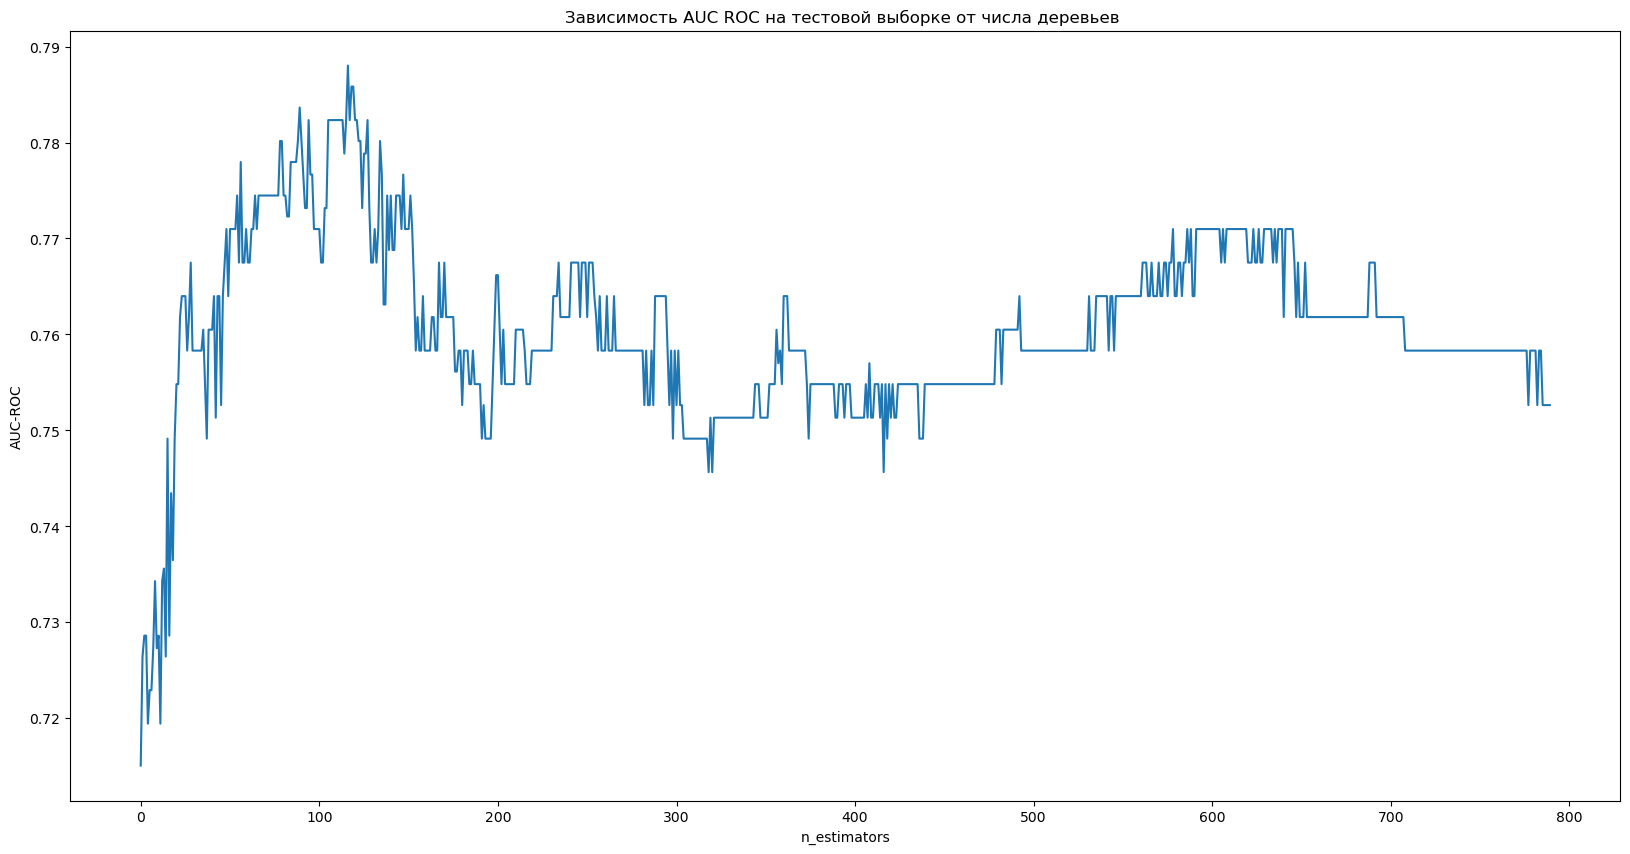

In [ ]:
auc_roc = []
for i in range(10, 800):
    rf = RandomForestClassifier(n_estimators = i, max_depth=15, min_samples_split = 10, random_state=12)
    rf.fit(X_train, y_train)
    auc_roc_sample = roc_auc_score(y_test, rf.predict(X_test))
    auc_roc.append(auc_roc_sample)

plt.figure(figsize=(20, 10))
plt.title("Зависимость AUC-ROC на тестовой выборке от числа деревьев ")
plt.plot(auc_roc)
plt.ylabel("AUC-ROC")
plt.xlabel("n_estimators")

Какие выводы можно сделать?
- по графику видно, что с увеличением числа деревье значение AUC-ROC постепенно выходит на асимптоту, AUC-ROC не сокращается => данное наблюдение можно отнести к преимуществам Random Forest (нет склонности к переобучению)

**Задание 3.6 (0.5 балла)** Для лучшей модели случайного леса из **Задания 3.4** посчитайте важность признаков и постройте bar plot. Какой признак оказался самым важным для определения диабета?

In [ ]:
important_features = pd.DataFrame({"Feature" : rf.feature_names_in_,
                                   "Importance" : rf.feature_importances_})
important_features

,Feature,Importance
0,Pregnancies,0.075985
1,Glucose,0.257153
2,BloodPressure,0.074429
3,SkinThickness,0.067003
4,Insulin,0.081363
5,BMI,0.191432
6,DiabetesPedigreeFunction,0.109336
7,Age,0.143298


 Какой признак оказался самым важным для определения диабета?
 - самым  важным оказался признак "Glucose"

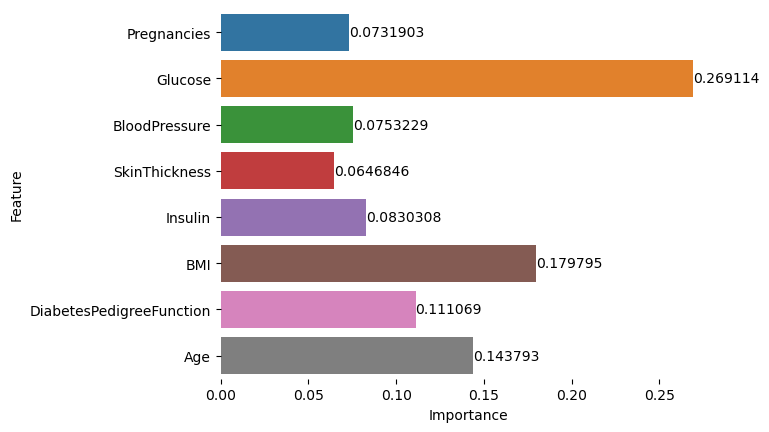

In [ ]:
features_image = sns.barplot(x = important_features["Importance"],
                y = important_features["Feature"])
sns.despine(bottom=True, left=True)
for value in features_image.containers:
    features_image.bar_label(value)